In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy import units as u

In [223]:
image_data = fits.getdata('hst/J0249-08/color_hst_10596_02_acs_wfc_f814w_f435w_sci.fits')[1]
position = (3175.6219, 3026.4975)
size = (150*2, 150*2) 

In [26]:
image_data = fits.getdata('hst/J022849.51-090153.8/cfht/CFHTMEGAPIPE-MegaPipe.073.162-MegaPipe.073.162.Z.MP9801/MegaPipe.073.162.Z.MP9801.fits')
position = (189.72333, 4385.4376)
size = (140, 140) 
GAIN=1.62
direct='hst/J022849.51-090153.8/cfht/'
position2 = (480.02733, 4381.2904)
size2 = (140, 140)   # pixels
#position = (3181.8086-160, 3004.6216-160)
#size = (60, 60)   # pixels
cutout2 = Cutout2D(image_data, position2, size2)
#0.187 arcsec


In [60]:
image_data = fits.getdata('hst/dong/CFHT/CFHTMEGAPIPE-G022.241.153+17.773-G022.241.153+17.773.R/G022.241.153+17.773.R.fits')
position = (6515.2423, 10939.273)
size = (80, 80) 
GAIN=1.62
direct='hst/dong/CFHT'
position2 = (5848.3726, 11280.173)
size2 = (160, 160)  # pixels
#position = (3181.8086-160, 3004.6216-160)
#size = (60, 60)   # pixels
cutout2 = Cutout2D(image_data, position2, size2)
#0.187 arcsec

In [23]:
image_data = fits.getdata('hst/J0249-08/decam/c4d_161022_051043_opi_Y_v1_extn=43_POS=42.30362,-8.25714_SIZE=0.1,0.1.fits')
position = (662.46444, 662.49354)
size = (90, 90) 
direct='hst/J0249-08/decam'
position2 = (685.96524, 979.29345)
size2 = (320, 320)   # pixels
#position = (3181.8086-160, 3004.6216-160)
#size = (60, 60)   # pixels
cutout2 = Cutout2D(image_data, position2, size2)
#0.26997048 arcsec
GAIN=4

In [6]:
image_data = fits.getdata('hst/dong/color_hst_13943_07_wfc3_uvis_f606w_f275w_sci_1.fits')
position = (1002, 1000)
size = (132*2, 132*2) 
direct='hst/dong'
position2 = (791.1024, 697.1712)
size2 = (400, 400)   # pixels
#position = (3181.8086-160, 3004.6216-160)
#size = (60, 60)   # pixels
cutout2 = Cutout2D(image_data, position2, size2)
#0.18572063

In [264]:
direct = 'hst/J022849.51-090153.8'
image_data = fits.getdata('hst/J022849.51-090153.8/hst_11130_11_wfpc2_f814w_pc_drz.fits')
position = (429.3, 461.8)
size = (300, 300)  # pixels
#position = (3181.8086-160, 3004.6216-160)
#size = (60, 60)   # pixels
cutout = Cutout2D(image_data, position, size)
#cutout.data[np.isnan(cutout.data)]=0

<ipython-input-90-d3874b20394d>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(cutout.data, cmap='gray', Norm=LogNorm())


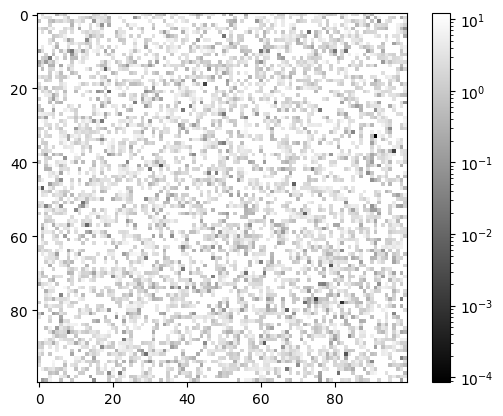

In [90]:
from matplotlib.colors import LogNorm
cutout = Cutout2D(image_data, position, size)
plt.imshow(cutout.data, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [39]:
hdu = fits.PrimaryHDU(cutout.data)
hdu.writeto(direct+'/image.fits', clobber=True)

4.826855521745994
1.7261345


<ipython-input-62-bfcf33c31644>:7: RuntimeWarning: invalid value encountered in sqrt
  err_flux_gal = np.sqrt(full_gal_data/GAIN)
<ipython-input-62-bfcf33c31644>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(err_flux_gal, cmap='gray', Norm=LogNorm())


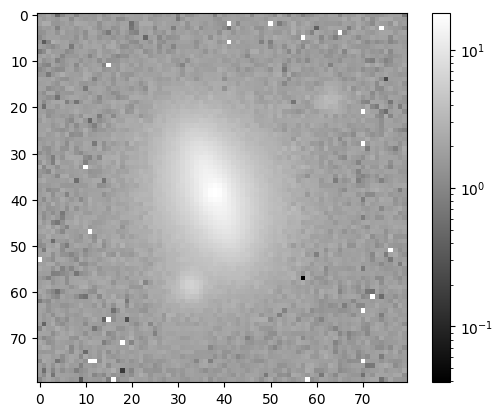

In [62]:
std_sky = np.nanstd(cutout2.data)
flux_sky = std_sky**2 * GAIN
print(flux_sky)
print(std_sky)
gal = cutout.data
full_gal_data = gal + flux_sky
err_flux_gal = np.sqrt(full_gal_data/GAIN)
err_flux_gal[np.isnan(err_flux_gal)]=0
hdu = fits.PrimaryHDU(err_flux_gal)
hdu.writeto(direct+'/err.fits', clobber=True)
plt.imshow(err_flux_gal, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [79]:
arr = np.zeros_like(cutout.data)

for i in range(30, 37):
    for j in range (53, 63):
        arr[j][i]=1
np.sum(arr)

70.0

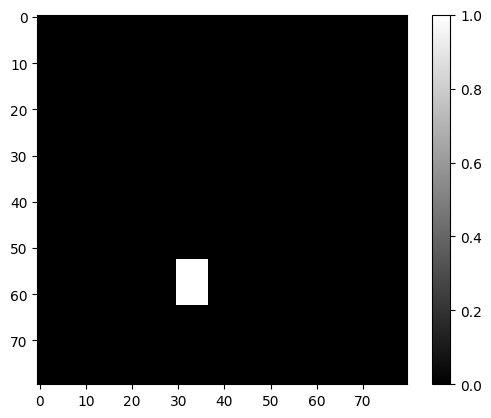

In [80]:
plt.imshow(arr, cmap='gray')
plt.colorbar()
hdu = fits.PrimaryHDU(arr)
hdu.writeto(direct+'/mask.fits', clobber=True)

In [77]:
direct

'hst/dong/CFHT'

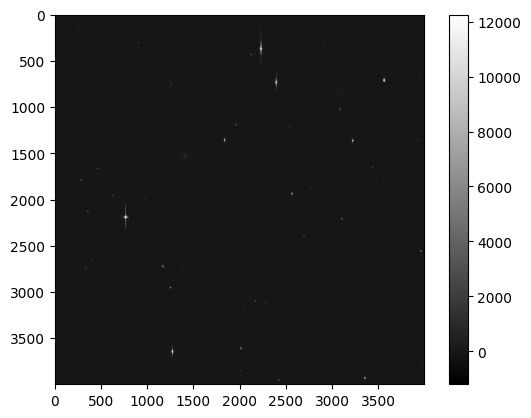

In [86]:
#image_data = fits.getdata('hst/J0249-08/color_hst_10596_02_acs_wfc_f814w_f435w_sci.fits')[2]
from astropy.nddata import Cutout2D
from astropy import units as u
position = (9582.6472, 12632.42)
size = (4000, 4000)   # pixels
cutout = Cutout2D(image_data, position, size)
from matplotlib.colors import LogNorm
cutout.data[np.isnan(cutout.data)]=0
plt.imshow(cutout.data, cmap='gray')
plt.colorbar()
hdu = fits.PrimaryHDU(cutout.data)
hdu.writeto(direct+'/forpsf.fits', clobber=True)

<ipython-input-87-a5f64c7d3fc7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(psf, cmap='gray', Norm=LogNorm())


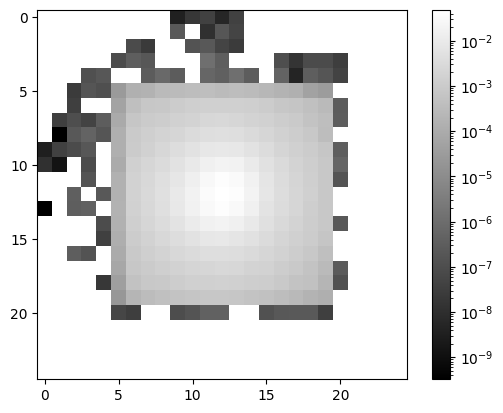

In [87]:
psf_data = fits.getdata(direct+'/res_catalog.psf')
#print(psf_data[0][0][0])
psf_data[0][0][0][psf_data[0][0][0]<0] = 0
psf = psf_data[0][0][0]/np.sum(psf_data[0][0][0])

from matplotlib.colors import LogNorm
plt.imshow(psf, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [88]:
hdu = fits.PrimaryHDU(psf)
hdu.writeto(direct+'/psf.fits', clobber=True)

<ipython-input-8-9fa1c50c93ef>:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(psf, cmap='gray', Norm=LogNorm())


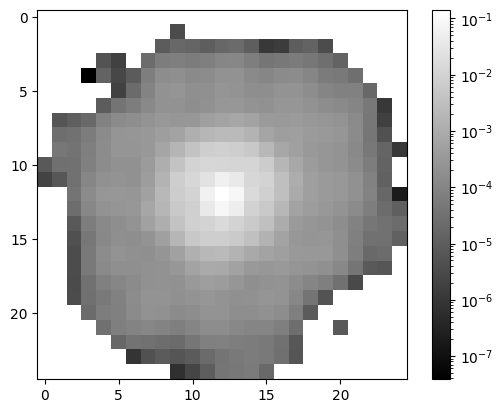

In [8]:
psf = fits.getdata('hst/J0249-08/psf_fromsite.fits')
from matplotlib.colors import LogNorm
arr = []
for i in range (len(psf[0])):
    count = 0
    new_arr = []
    a=0
    for j in range (len(psf[0])):
        if count<4:
            a=a+psf[i][j]
            count = count+1
        if count==4:
            new_arr.append(a)
            a=0
            count=0
    arr.append(new_arr)
arr=np.array(arr)   
arr = arr.transpose()
arr2 = []
for i in range (25):
    count = 0
    new_arr = []
    a=0
    for j in range (len(arr[0])):
        if count<4:
            a=a+arr[i][j]
            count = count+1
        if count==4:
            new_arr.append(a)
            a=0
            count=0
    arr2.append(new_arr)
psf=np.array(arr2)       
psf[psf<0] = 0
psf = psf/np.sum(psf)
plt.imshow(psf, cmap='gray', Norm=LogNorm())
plt.colorbar()
hdu = fits.PrimaryHDU(psf)
hdu.writeto(direct+'/psf_fromsite_corr.fits', clobber=True)

In [12]:
np.sum(psf)


1.0

nan
nan


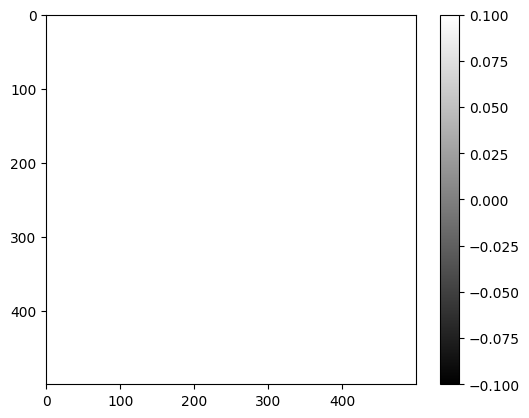